# Image Super Resolution #1
<hr style='height:5px'>
kwanki.ahn<br>
2019/06/08(Sun) skeleton<br>
2019/06/15(Sat) update<br>
refer :<br>
&nbsp;&nbsp;https://arxiv.org/abs/1501.00092<br>
&nbsp;&nbsp;https://jamiekang.github.io/2017/04/24/image-super-resolution-using-deep-convolutional-networks/<br>
&nbsp;&nbsp;https://github.com/titu1994/Image-Super-Resolution<br>
&nbsp;&nbsp;https://github.com/jormeli/srcnn-keras<br>
&nbsp;&nbsp;https://github.com/MarkPrecursor/SRCNN-keras<br>
<hr style='height:5px'>



# Dataset

In [32]:
# image dataset source : https://data.vision.ee.ethz.ch/cvl/DIV2K/
# Let's start with
# (NTIRE 2017) Low Res Images:
#     Train Data Track 2 unknown downgrading operators x2 (LR images)
#     Validation Data Track 2 unknown downgrading operators x2 (LR images)
# High Resolution Images:
#     Train Data (HR images)
#     Validation Data (HR images)

# Download image
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_unknown_X2.zip
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_unknown_X2.zip
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip

# unzip into
# /home/jupyter/sr/image_sr_dataset/DIV2K_train_LR_unknown/X2/
# /home/jupyter/sr/image_sr_dataset/DIV2K_train_HR
# /home/jupyter/sr/image_sr_dataset/DIV2K_valid_LR_unknown/X2/
# /home/jupyter/sr/image_sr_dataset/DIV2K_valid_HR

# Init

In [33]:
from __future__ import print_function, division

from keras.models import Model
from keras.layers import Concatenate, Add, Average, Input, Dense, Flatten, BatchNormalization, Activation, LeakyReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, Convolution2DTranspose
from keras import backend as K
from keras.utils.np_utils import to_categorical
import keras.callbacks as callbacks
import keras.optimizers as optimizers

# Function

In [34]:
import keras, tensorflow
keras.__version__, tensorflow.__version__

('2.0.6', '1.13.1')

In [35]:
def list_files(path_in):
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(path_in) if isfile(join(path_in, f))]
    return onlyfiles

# UNIT TEST
sorted(list_files("/home/jupyter/sr/image_sr_dataset/DIV2K_train_LR_unknown/X2/"))[:3]

['0001x2.png', '0002x2.png', '0003x2.png']

In [36]:
def get_image_data(path_in, K=987654321, resize=None, force_down_quality=None):
    print ("== get_image_data() start")
    files = sorted(list_files(path_in))[:K]
    import scipy
    image_data_l = []
    for f in files:
        print ("  reading..{}".format(f))
        read_data = scipy.misc.imread("{}{}".format(path_in, f))
        if resize is not None:
            read_data = scipy.misc.imresize(read_data, resize)
        if force_down_quality is not None:
            scale = force_down_quality
            read_data = scipy.misc.imresize(read_data, 1.0/scale, 'bicubic')
            read_data = scipy.misc.imresize(read_data, scale/1.0, 'bicubic')
        image_data_l.append(read_data)
            
    return image_data_l

In [37]:
def display_images(images, columns=4, rows=5, figsize_in=(10, 10)):
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=figsize_in)
    max_index = min(len(images), range(1, columns*rows))
    for i in range(0, max_index):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(images[i])
    plt.show()

In [38]:
def display_image(image, figsize_in=(10, 10)):
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=figsize_in)
    plt.imshow(image)
    plt.show()

# Main

In [39]:
test_cnt = 50
test_resolution = (512, 512)

In [40]:
image_data_l = get_image_data("/home/jupyter/sr/image_sr_dataset/DIV2K_train_LR_unknown/X2/", K=test_cnt, resize=test_resolution, force_down_quality=4)

== get_image_data() start
  reading..0001x2.png
  reading..0002x2.png
  reading..0003x2.png
  reading..0004x2.png


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


  reading..0005x2.png
  reading..0006x2.png
  reading..0007x2.png
  reading..0008x2.png
  reading..0009x2.png
  reading..0010x2.png
  reading..0011x2.png
  reading..0012x2.png
  reading..0013x2.png
  reading..0014x2.png
  reading..0015x2.png
  reading..0016x2.png
  reading..0017x2.png
  reading..0018x2.png
  reading..0019x2.png
  reading..0020x2.png
  reading..0021x2.png
  reading..0022x2.png
  reading..0023x2.png
  reading..0024x2.png
  reading..0025x2.png
  reading..0026x2.png
  reading..0027x2.png
  reading..0028x2.png
  reading..0029x2.png
  reading..0030x2.png
  reading..0031x2.png
  reading..0032x2.png
  reading..0033x2.png
  reading..0034x2.png
  reading..0035x2.png
  reading..0036x2.png
  reading..0037x2.png
  reading..0038x2.png
  reading..0039x2.png
  reading..0040x2.png
  reading..0041x2.png
  reading..0042x2.png
  reading..0043x2.png
  reading..0044x2.png
  reading..0045x2.png
  reading..0046x2.png
  reading..0047x2.png
  reading..0048x2.png
  reading..0049x2.png
  reading.

In [41]:
image_data_h = get_image_data("/home/jupyter/sr/image_sr_dataset/DIV2K_train_HR/", K=test_cnt, resize=test_resolution)

== get_image_data() start
  reading..0001.png
  reading..0002.png


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


  reading..0003.png
  reading..0004.png
  reading..0005.png
  reading..0006.png
  reading..0007.png
  reading..0008.png
  reading..0009.png
  reading..0010.png
  reading..0011.png
  reading..0012.png
  reading..0013.png
  reading..0014.png
  reading..0015.png
  reading..0016.png
  reading..0017.png
  reading..0018.png
  reading..0019.png
  reading..0020.png
  reading..0021.png
  reading..0022.png
  reading..0023.png
  reading..0024.png
  reading..0025.png
  reading..0026.png
  reading..0027.png
  reading..0028.png
  reading..0029.png
  reading..0030.png
  reading..0031.png
  reading..0032.png
  reading..0033.png
  reading..0034.png
  reading..0035.png
  reading..0036.png
  reading..0037.png
  reading..0038.png
  reading..0039.png
  reading..0040.png
  reading..0041.png
  reading..0042.png
  reading..0043.png
  reading..0044.png
  reading..0045.png
  reading..0046.png
  reading..0047.png
  reading..0048.png
  reading..0049.png
  reading..0050.png


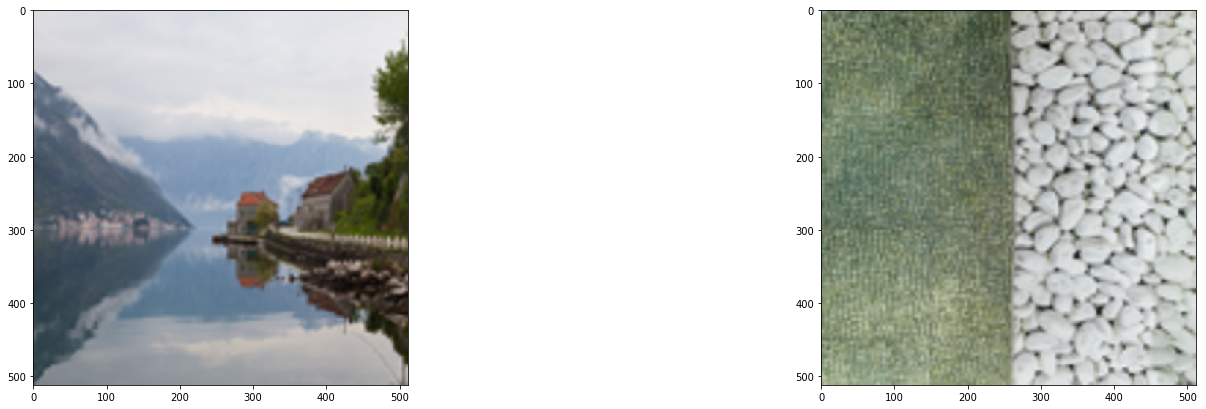

In [42]:
display_images(image_data_l[3:5], columns=3, rows=5, figsize_in=(40, 40))

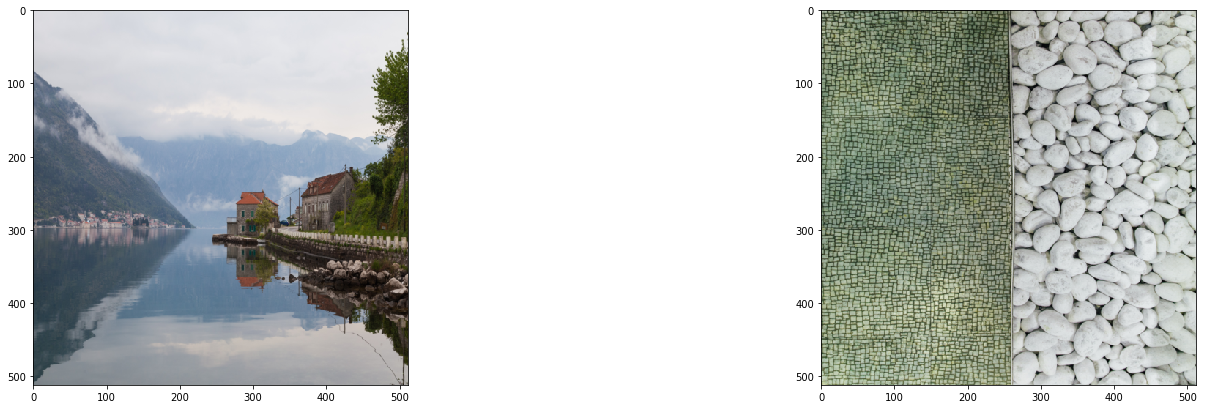

In [43]:
display_images(image_data_h[3:5], columns=3, rows=5, figsize_in=(40, 40))

In [44]:
import numpy as np
print (np.array(image_data_l).shape)
print (np.array(image_data_h).shape)

(50, 512, 512, 3)
(50, 512, 512, 3)


In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
import numpy
import math

def model(input_resolution):
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    i_shape = (input_resolution[0], input_resolution[1], 3)
    print ("input_shape : {}".format(i_shape))
    SRCNN.add(Conv2D(kernel_initializer="glorot_uniform", activation="relu", input_shape=i_shape, padding="same", filters=128, use_bias=True, kernel_size=(9, 9)))
    SRCNN.add(Conv2D(kernel_initializer="glorot_uniform", activation="relu", padding="same", filters=64, use_bias=True, kernel_size=(3, 3)))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(kernel_initializer="glorot_uniform", activation="linear", padding="same", filters=3, use_bias=True, kernel_size=(5, 5)))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN

In [46]:
srcnn = model(test_resolution)

input_shape : (512, 512, 3)


In [47]:
srcnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 512, 512, 128)     31232     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 512, 512, 64)      73792     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 512, 512, 3)       4803      
Total params: 109,827
Trainable params: 109,827
Non-trainable params: 0
_________________________________________________________________


## Train & save weights

In [ ]:
srcnn.fit(np.array(image_data_l), np.array(image_data_h), batch_size=5, nb_epoch=6)

In [ ]:
srcnn.save_weights("model.h5")

## Load weights

In [48]:
srcnn.load_weights("model.h5")

## Evaluate

In [ ]:
# TODO
# Train me with GPU, many epoches (CPU : took over 30 mins just 10 epoches)
# anyway image is changed a slightly, 

In [76]:
preds = srcnn.predict(np.array(image_data_l[3:5]))

In [77]:
preds = preds.astype(int)

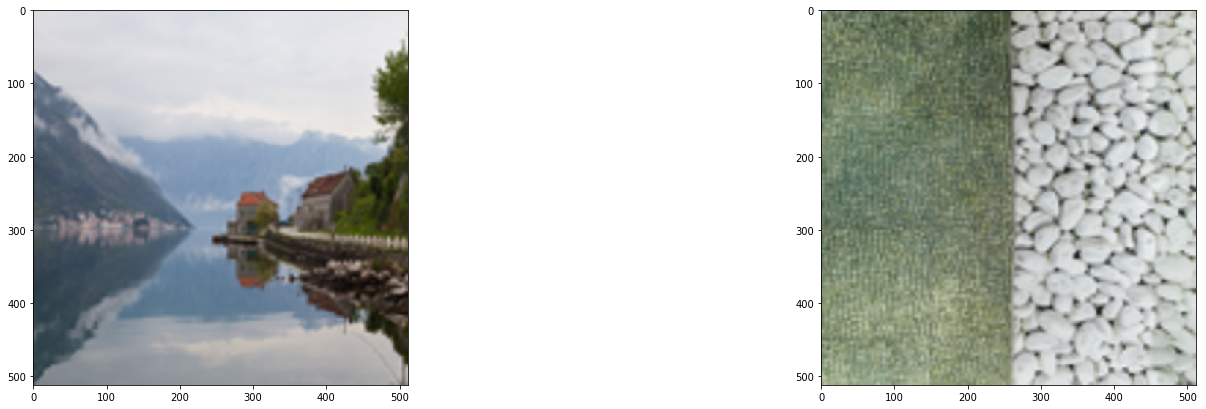

In [79]:
display_images(image_data_l[3:5], columns=3, rows=5, figsize_in=(40, 40))

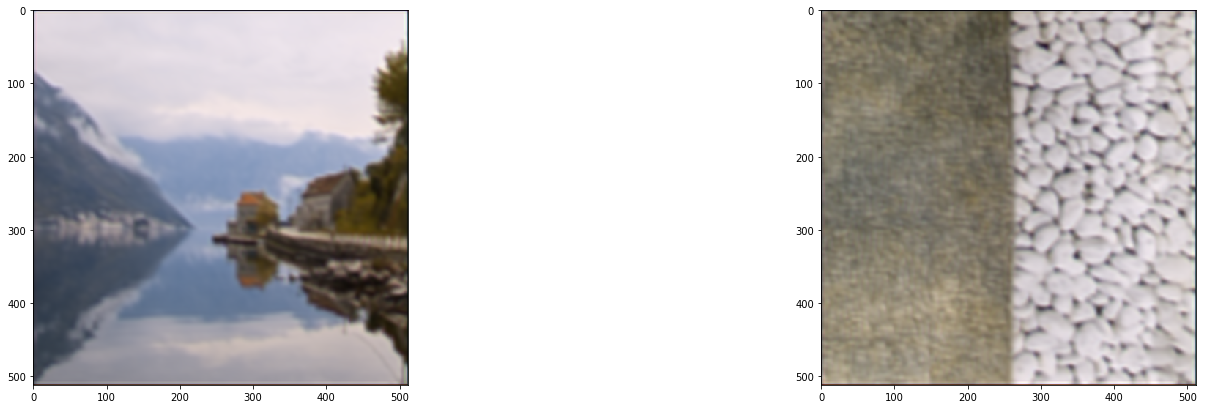

In [80]:
display_images(preds, columns=3, rows=5, figsize_in=(40, 40))

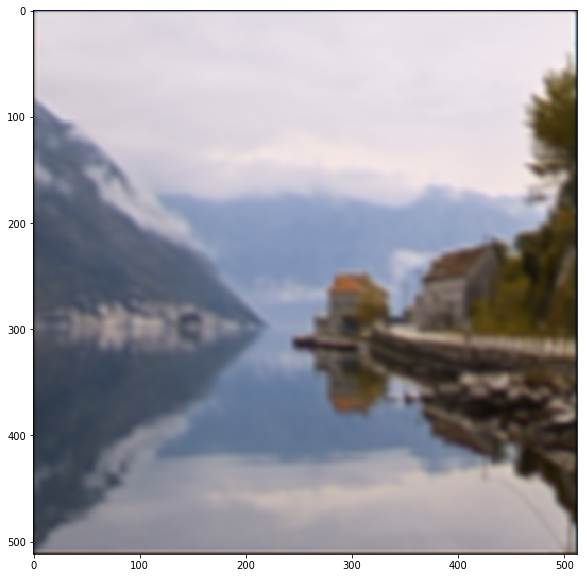

In [81]:
display_image(preds[0])